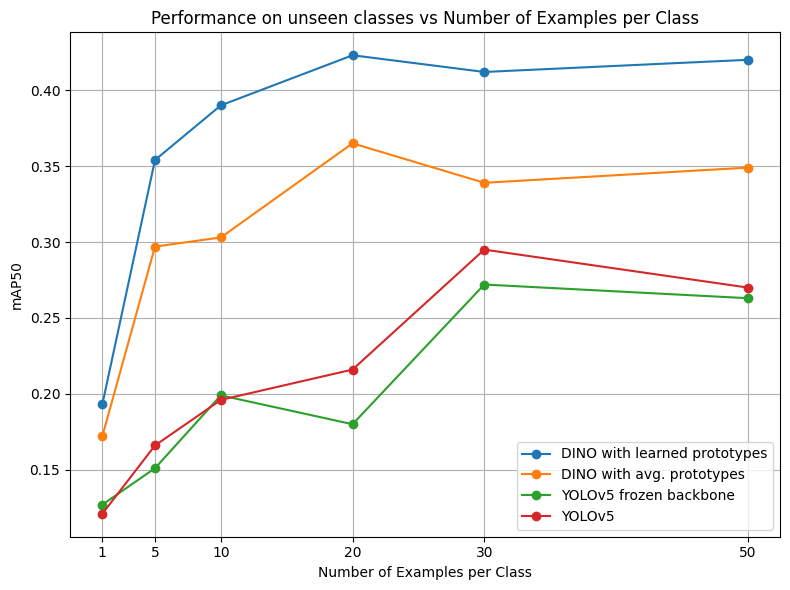

In [2]:
import matplotlib.pyplot as plt

simd_emb_map50_base = [0.200, 0.603, 0.276, 0.411, 0.388, 0.49275]  # mAP scores for base classes
simd_emb_map50_rare_dino = [0.193, 0.354, 0.390, 0.423, 0.412, 0.420]  # mAP scores for rare classes
simd_emb_map50_rare_yolo_frozen = [0.127, 0.151, 0.199, 0.180, 0.272, 0.263]
simd_emb_map50_rare_yolo = [0.121, 0.166, 0.196, 0.216, 0.295, 0.270]
simd_emb_map50_rare_dino_avg = [0.172, 0.297, 0.303, 0.365, 0.339, 0.349]

# Number of examples per class
N = [1, 5, 10, 20, 30, 50]

# Plotting the results
plt.figure(figsize=(8, 6))

plt.plot(N, simd_emb_map50_rare_dino, marker='o', label='DINO with learned prototypes')
plt.plot(N, simd_emb_map50_rare_dino_avg, marker='o', label='DINO with avg. prototypes')
plt.plot(N, simd_emb_map50_rare_yolo_frozen, marker='o', label='YOLOv5 frozen backbone')
plt.plot(N, simd_emb_map50_rare_yolo, marker='o', label='YOLOv5')

plt.title('Performance on unseen classes vs Number of Examples per Class')
plt.xlabel('Number of Examples per Class')
plt.ylabel('mAP50')
plt.xticks(N)  # Set x-axis ticks to the values in N
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()